In [85]:
import pandas as pd
import networkx as nx
import numpy as np
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [32]:
# Load train samples 
with open("train.txt", "r") as f:
    reader = csv.reader(f)
    train_set = list(reader)
train_set = [element[0].split(" ") for element in train_set]
train_set[:4]

[['939', '3809', '1'],
 ['2442', '5784', '1'],
 ['179', '3809', '1'],
 ['857', '2280', '1']]

In [33]:
# Convert train set into a graph
G_train = nx.Graph()
for edge in train_set:
    G_train.add_edge(edge[0], edge[1])
print("The number of nodes: {}".format(G_train.number_of_nodes()))
print("The number of edges: {}".format(G_train.number_of_edges()))
# Check that the graph is connected
print("The number of connected components: {}".format(nx.number_connected_components(G_train)))

The number of nodes: 3597
The number of edges: 10496
The number of connected components: 1


In [34]:
# Load test samples 
with open("test.txt", "r") as f:
    reader = csv.reader(f)
    test_set = list(reader)
test_set = [element[0].split(" ") for element in test_set]

In [35]:
# Convert train set into a graph
G_test = nx.Graph()
for edge in test_set:
    G_test.add_edge(edge[0], edge[1])
print("The number of nodes: {}".format(G_test.number_of_nodes()))
print("The number of edges: {}".format(G_test.number_of_edges()))
# Check that the graph is connected
print("The number of connected components: {}".format(nx.number_connected_components(G_test)))

The number of nodes: 2856
The number of edges: 3498
The number of connected components: 149


In [135]:
train_samples, train_labels, test_samples = [(element[0],element[1]) for element in train_set], [element[2] for element in train_set], [(element[0],element[1]) for element in test_set]
# Convert labels into integers
train_labels = [int(label) for label in train_labels]
train_labels[:4]

[1, 1, 1, 1]

In [163]:
#Import information about nodes (index represents the node id)
node_information = pd.read_csv('./node_information.csv', header=None)
node_information.rename(columns = {0:'node_id'}, inplace = True)
print(list(node_information.loc[node_information['node_id'] == 939].iloc[0,:]))
node_information

[939.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

,node_id,1,2,3,4,5,6,7,8,9,...,923,924,925,926,927,928,929,930,931,932
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,7584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3593,7589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3594,7593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3595,7594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
def feature_extractor(samples, node_information):
    """
    Creates a feature vector for each edge of the graph contained in samples 
    """
    feature_vector = [] 
    for edge in tqdm(samples):
        source_node, target_node = int(edge[0]), int(edge[1])
        source_node_information = list(node_information.loc[node_information['node_id'] == source_node].iloc[0, 1:])
        target_node_information = list(node_information.loc[node_information['node_id'] == target_node].iloc[0, 1:])
        # Create edge feature vector with all metric computed above
        feature_vector.append(np.concatenate([source_node_information, target_node_information]) ) 
        
    return feature_vector

In [166]:
# --- Create feature vector for all edges in training set and test set ---
train_features = feature_extractor( train_samples, node_information)
test_features = feature_extractor(test_samples, node_information)
print(train_features[:4])
print(test_features[:4])

100%|██████████| 3498/3498 [00:07<00:00, 440.09it/s]

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]


In [167]:
def prediction( train_features, test_features, train_labels):
    """
    Downstream ML task using edge embeddings to classify them 
    """
    
    # --- Build the model and train it ---
    lr = LogisticRegression()
    lr.fit(train_features, train_labels)
    train_preds =  lr.predict(train_features)#
    test_preds = lr.predict(test_features)#

    # --- Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from predictions ---
    # Fill in the blanks
    fpr, tpr, _ = roc_curve(train_labels, train_preds)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return test_preds

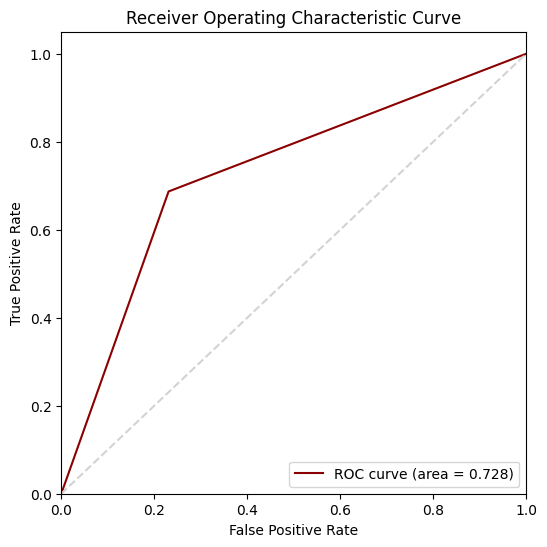

In [168]:
test_preds = prediction(train_features, test_features, train_labels)

In [170]:
logistic_pred = zip(np.array(range(len(test_set))), test_preds)

In [171]:
with open("logistic_predictions.csv","w") as pred:
    csv_out = csv.writer(pred)
    csv_out.writerow(i for i in ["ID", "Predicted"])
    for row in logistic_pred:
         csv_out.writerow(row)
    pred.close()